In [78]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
from statsmodels.graphics.tsaplots import plot_acf

In [79]:
def makeIntoCSV(fileLocation: str, filename: str):
    # Read the text file
    with open(fileLocation, 'r') as file:
        lines = file.readlines()

    # Remove the first two lines
    lines = lines[2:]

    # Join the remaining lines
    data = "\n".join(lines)

    # Create a DataFrame from the text
    df = pd.read_csv(StringIO(data), sep=r'\s+')

    # Save the DataFrame to a CSV file
    df.to_csv(filename, index=False)
    return df

In [80]:
# make dataframe

vortex_10m = makeIntoCSV(r"C:\Users\ricky\Documents\UI\Semester 2\wind energy\Exercise 2\vortex.serie.733611.6m 10m UTC+08.0 CFSR.txt", "vortex_10m.csv")

vortex_50m = makeIntoCSV(r"C:\Users\ricky\Documents\UI\Semester 2\wind energy\Exercise 2\vortex.serie.733611.6m 50m UTC+08.0 CFSR.txt", "vortex_50m.csv")

vortex_100m = makeIntoCSV(r"C:\Users\ricky\Documents\UI\Semester 2\wind energy\Exercise 2\vortex.serie.733611.6m 100m UTC+08.0 CFSR.txt", "vortex_100m.csv")

In [81]:
vortex_10m['HHMM'] = vortex_10m['HHMM']//100
vortex_50m['HHMM'] = vortex_50m['HHMM']//100
vortex_100m['HHMM'] = vortex_100m['HHMM']//100


In [82]:
print(vortex_50m)

      YYYYMMDD  HHMM  M(m/s)  D(deg)  T(C)  De(k/m3)  PRE(hPa)  RiNumber  \
0     20200101     8     5.9     281  25.1      1.14     971.7     -0.49   
1     20200101     9     5.9     279  25.6      1.13     971.5     -0.91   
2     20200101    10     5.8     278  25.8      1.13     971.3     -1.27   
3     20200101    11     5.5     278  26.1      1.13     971.0     -1.67   
4     20200101    12     5.3     277  26.2      1.13     970.8     -1.91   
...        ...   ...     ...     ...   ...       ...       ...       ...   
4387  20200702     3     5.2     106  23.6      1.14     970.0      0.25   
4388  20200702     4     5.2     109  23.6      1.14     970.1      0.26   
4389  20200702     5     5.2     110  23.6      1.14     970.2      0.24   
4390  20200702     6     5.5     109  23.6      1.14     970.3      0.22   
4391  20200702     7     5.8     109  23.7      1.14     970.4      0.06   

      RH(%)  RMOL(1/m)  
0      94.7    -0.0035  
1      90.3    -0.0053  
2      89.6 

In [83]:
# importing NSRDB data
NSRDB = pd.read_csv(r"C:\Users\ricky\Documents\UI\Semester 2\wind energy\Exercise 2\data kecepatan wind di pulau selayar.csv")

NSRDB = NSRDB.drop(['wind speed_10 m', 'wind direction_10 m'], axis=1)

NSRDB = NSRDB.set_index(['timestamp', 'hour'])

NSRDB= NSRDB.rename_axis(['YYYYMMDD','HHMM'])

NSRDB = NSRDB.rename(columns={"wind speed": "M(m/s)_2m", 'wind direction': 'D(deg)_2m', 'friction velocity': 'u*_2m'})

print(NSRDB)

               M(m/s)_2m  D(deg)_2m     u*_2m
YYYYMMDD HHMM                                
20200101 0           4.1      281.0  5.700738
         1           4.1      265.0  5.700738
         2           4.2      257.0  5.839780
         3           4.3      262.0  5.978822
         4           4.5      266.0  6.256907
...                  ...        ...       ...
20201231 19          1.0      227.0  1.390424
         20          1.0      210.0  1.390424
         21          1.1      199.0  1.529466
         22          1.2      201.0  1.668509
         23          1.5      209.0  2.085636

[8784 rows x 3 columns]


In [84]:
vortex_100m = vortex_100m.set_index(['YYYYMMDD', 'HHMM'])
vortex_50m = vortex_50m.set_index(['YYYYMMDD', 'HHMM'])
vortex_10m = vortex_10m.set_index(['YYYYMMDD', 'HHMM'])

vortex_50m

M(m/s)  D(deg)  T(C)  De(k/m3)  PRE(hPa)  RiNumber  RH(%)  \
YYYYMMDD HHMM                                                              
20200101 8        5.9     281  25.1      1.14     971.7     -0.49   94.7   
         9        5.9     279  25.6      1.13     971.5     -0.91   90.3   
         10       5.8     278  25.8      1.13     971.3     -1.27   89.6   
         11       5.5     278  26.1      1.13     971.0     -1.67   86.3   
         12       5.3     277  26.2      1.13     970.8     -1.91   84.3   
...               ...     ...   ...       ...       ...       ...    ...   
20200702 3        5.2     106  23.6      1.14     970.0      0.25   92.4   
         4        5.2     109  23.6      1.14     970.1      0.26   92.4   
         5        5.2     110  23.6      1.14     970.2      0.24   92.1   
         6        5.5     109  23.6      1.14     970.3      0.22   91.6   
         7        5.8     109  23.7      1.14     970.4      0.06   89.4   

               RMOL(1/m)  
YYYYMMDD HHMM             
20200101 8       -0.0035  
         9       -0.0053  
         10      -0.0068  
         11      -0.0080  
         12      -0.0090  
...                  ...  
20200702 3        0.0034  
         4        0.0035  
         5        0.0035  
         6        0.0031  
         7        0.0013  

[4392 rows x 8 columns]

In [85]:
# rename collumns
vortex_100m.columns = [f'{col}_100m' for col in vortex_100m.columns]
vortex_50m.columns = [f'{col}_50m' for col in vortex_50m.columns]
vortex_10m.columns = [f'{col}_10m' for col in vortex_10m.columns]

print(vortex_100m)



               M(m/s)_100m  D(deg)_100m  T(C)_100m  De(k/m3)_100m  \
YYYYMMDD HHMM                                                       
20200101 8             6.4          281       24.5           1.13   
         9             6.2          279       24.9           1.13   
         10            6.1          279       25.2           1.13   
         11            5.8          278       25.4           1.13   
         12            5.5          277       25.6           1.13   
...                    ...          ...        ...            ...   
20200702 3             5.6          107       23.2           1.13   
         4             5.6          110       23.2           1.13   
         5             5.6          111       23.2           1.13   
         6             5.9          110       23.2           1.13   
         7             6.2          110       23.2           1.13   

               PRE(hPa)_100m  RiNumber_100m  RH(%)_100m  RMOL(1/m)_100m  
YYYYMMDD HHMM               

In [87]:
# merge the dataframe
dummy_dataframe = pd.merge(vortex_100m, vortex_50m, left_index=True, right_index=True)
wind_dataframe = pd.merge(dummy_dataframe, vortex_10m, left_index=True, right_index=True )

print(wind_dataframe)

               M(m/s)_100m  D(deg)_100m  T(C)_100m  De(k/m3)_100m  \
YYYYMMDD HHMM                                                       
20200101 8             6.4          281       24.5           1.13   
         9             6.2          279       24.9           1.13   
         10            6.1          279       25.2           1.13   
         11            5.8          278       25.4           1.13   
         12            5.5          277       25.6           1.13   
...                    ...          ...        ...            ...   
20200702 3             5.6          107       23.2           1.13   
         4             5.6          110       23.2           1.13   
         5             5.6          111       23.2           1.13   
         6             5.9          110       23.2           1.13   
         7             6.2          110       23.2           1.13   

               PRE(hPa)_100m  RiNumber_100m  RH(%)_100m  RMOL(1/m)_100m  \
YYYYMMDD HHMM              

In [88]:
# Joining the NSRDB data

coba_dataframe = pd.merge(wind_dataframe, NSRDB, left_index=True, right_index=True)
print(coba_dataframe)

               M(m/s)_100m  D(deg)_100m  T(C)_100m  De(k/m3)_100m  \
YYYYMMDD HHMM                                                       
20200101 8             6.4          281       24.5           1.13   
         9             6.2          279       24.9           1.13   
         10            6.1          279       25.2           1.13   
         11            5.8          278       25.4           1.13   
         12            5.5          277       25.6           1.13   
...                    ...          ...        ...            ...   
20200702 3             5.6          107       23.2           1.13   
         4             5.6          110       23.2           1.13   
         5             5.6          111       23.2           1.13   
         6             5.9          110       23.2           1.13   
         7             6.2          110       23.2           1.13   

               PRE(hPa)_100m  RiNumber_100m  RH(%)_100m  RMOL(1/m)_100m  \
YYYYMMDD HHMM              

In [89]:
# cleaning unwanted data

coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'T(C)*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'PRE*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'RiNumber*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'RH*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'RMOL*')))]
coba_dataframe = coba_dataframe[coba_dataframe.columns.drop(list(coba_dataframe.filter(regex=r'De(k/m3)*')))]

print(coba_dataframe)

               M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD HHMM                                                                 
20200101 8             6.4          281         5.9         281         4.3   
         9             6.2          279         5.9         279         4.4   
         10            6.1          279         5.8         278         4.4   
         11            5.8          278         5.5         278         4.2   
         12            5.5          277         5.3         277         4.1   
...                    ...          ...         ...         ...         ...   
20200702 3             5.6          107         5.2         106         3.6   
         4             5.6          110         5.2         109         3.6   
         5             5.6          111         5.2         110         3.6   
         6             5.9          110         5.5         109         3.8   
         7             6.2          110         5.8 

In [90]:
coba_dataframe.to_csv("wind data at Pulau Selayar.csv")

In [91]:
zo = 1.5 # daerah hutan
k = 0.4 # karman constant
z1 = 2
z2 = 10
z3 = 50
z4 = 100

(200.0, 300.0)

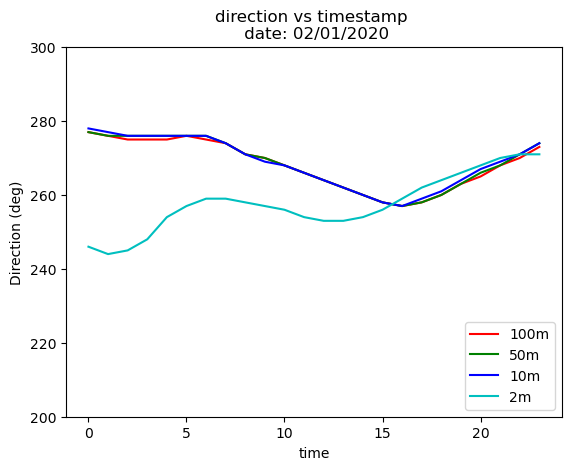

In [92]:
time_20200102_df =coba_dataframe.loc[20200102]
time_20200102_df

plt.plot(time_20200102_df.index, time_20200102_df['D(deg)_100m'], color='r', label='100m')
plt.plot(time_20200102_df.index, time_20200102_df['D(deg)_50m'], color='g', label='50m')
plt.plot(time_20200102_df.index, time_20200102_df['D(deg)_10m'], color='b', label='10m')
plt.plot(time_20200102_df.index, time_20200102_df['D(deg)_2m'], color='c', label='2m')

plt.xlabel("time") 
plt.ylabel("Direction (deg)") 
plt.title("direction vs timestamp \n date: 02/01/2020") 

plt.legend(loc='lower right')
plt.ylim([200, 300])

(200.0, 300.0)

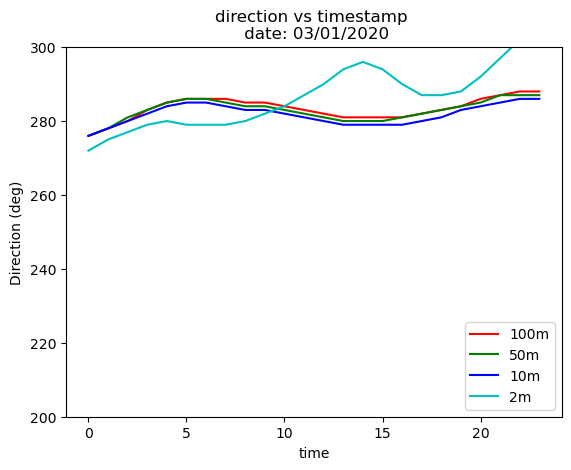

In [93]:
time_20200103_df =coba_dataframe.loc[20200103]
time_20200103_df

plt.plot(time_20200103_df.index, time_20200103_df['D(deg)_100m'], color='r', label='100m')
plt.plot(time_20200103_df.index, time_20200103_df['D(deg)_50m'], color='g', label='50m')
plt.plot(time_20200103_df.index, time_20200103_df['D(deg)_10m'], color='b', label='10m')
plt.plot(time_20200103_df.index, time_20200103_df['D(deg)_2m'], color='c', label='2m')

plt.xlabel("time") 
plt.ylabel("Direction (deg)") 
plt.title("direction vs timestamp \n date: 03/01/2020") 

plt.legend(loc='lower right')
plt.ylim([200, 300])

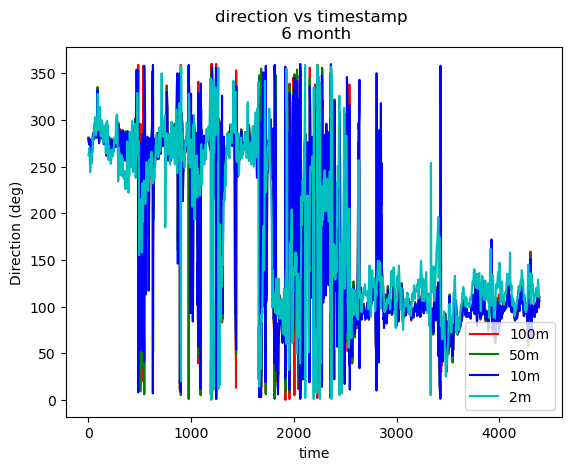

In [95]:
time_df =coba_dataframe

plt.plot(range(0, len(time_df)), time_df['D(deg)_100m'], color='r', label='100m')
plt.plot(range(0, len(time_df)), time_df['D(deg)_50m'], color='g', label='50m')
plt.plot(range(0, len(time_df)), time_df['D(deg)_10m'], color='b', label='10m')
plt.plot(range(0, len(time_df)), time_df['D(deg)_2m'], color='c', label='2m')

plt.xlabel("time") 
plt.ylabel("Direction (deg)") 
plt.title("direction vs timestamp \n 6 month") 

plt.legend(loc='lower right')

In [96]:
# karena faktor kestabilan, digunakan kecepatan pada ketinggian 100 m

coba_dataframe['u_100m'] = coba_dataframe['M(m/s)_100m'] * np.cos(np.deg2rad(coba_dataframe['D(deg)_100m']))
coba_dataframe['v_100m'] = coba_dataframe['M(m/s)_100m'] * np.sin(np.deg2rad(coba_dataframe['D(deg)_100m']))
coba_dataframe['w_100m'] = [0] * len(coba_dataframe.index)

coba_dataframe

M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD HHMM                                                                 
20200101 8             6.4          281         5.9         281         4.3   
         9             6.2          279         5.9         279         4.4   
         10            6.1          279         5.8         278         4.4   
         11            5.8          278         5.5         278         4.2   
         12            5.5          277         5.3         277         4.1   
...                    ...          ...         ...         ...         ...   
20200702 3             5.6          107         5.2         106         3.6   
         4             5.6          110         5.2         109         3.6   
         5             5.6          111         5.2         110         3.6   
         6             5.9          110         5.5         109         3.8   
         7             6.2          110         5.8         109         4.1   

               D(deg)_10m  M(m/s)_2m  D(deg)_2m     u*_2m    u_100m    v_100m  \
YYYYMMDD HHMM                                                                   
20200101 8            280        5.1      262.0  7.091161  1.221178 -6.282414   
         9            278        5.1      263.0  7.091161  0.969894 -6.123668   
         10           277        5.3      263.0  7.369246  0.954250 -6.024899   
         11           276        5.5      263.0  7.647331  0.807204 -5.743555   
         12           276        5.8      265.0  8.064458  0.670281 -5.459004   
...                   ...        ...        ...       ...       ...       ...   
20200702 3            104        5.1      111.0  7.091161 -1.637282  5.355307   
         4            106        4.9      110.0  6.813077 -1.915313  5.262279   
         5            107        4.7      110.0  6.534992 -2.006861  5.228050   
         6            106        4.6      111.0  6.395949 -2.017919  5.544186   
         7            106        4.5      111.0  6.256907 -2.120525  5.826094   

               w_100m  
YYYYMMDD HHMM          
20200101 8          0  
         9          0  
         10         0  
         11         0  
         12         0  
...               ...  
20200702 3          0  
         4          0  
         5          0  
         6          0  
         7          0  

[4392 rows x 12 columns]

In [106]:
coba_dataframe = coba_dataframe.reset_index()
coba_dataframe['YYYYMMDD'] = pd.to_datetime(coba_dataframe['YYYYMMDD'], format= r'%Y%m%d')
coba_dataframe = coba_dataframe.set_index(['YYYYMMDD', 'HHMM'])

print(coba_dataframe)

                 M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD   HHMM                                                                 
2020-01-01 8             6.4          281         5.9         281         4.3   
           9             6.2          279         5.9         279         4.4   
           10            6.1          279         5.8         278         4.4   
           11            5.8          278         5.5         278         4.2   
           12            5.5          277         5.3         277         4.1   
...                      ...          ...         ...         ...         ...   
2020-07-02 3             5.6          107         5.2         106         3.6   
           4             5.6          110         5.2         109         3.6   
           5             5.6          111         5.2         110         3.6   
           6             5.9          110         5.5         109         3.8   
           7             6.2

In [113]:
# Slice the DataFrame to select data for a specific month (e.g., January)
start_date = '20200201'  # Use the format matching your semi-datetime index
end_date = '20200229'  # Use the format matching your semi-datetime index
one_month_df = coba_dataframe[(coba_dataframe.index.get_level_values(0) >= start_date) & (coba_dataframe.index.get_level_values(0) <= end_date)]

print(one_month_df)

                 M(m/s)_100m  D(deg)_100m  M(m/s)_50m  D(deg)_50m  M(m/s)_10m  \
YYYYMMDD   HHMM                                                                 
2020-02-01 0             9.5          284         8.2         284         5.3   
           1             9.4          283         8.3         283         5.3   
           2             9.4          281         8.4         281         5.4   
           3             9.4          280         8.4         280         5.5   
           4             9.5          279         8.5         279         5.5   
...                      ...          ...         ...         ...         ...   
2020-02-29 19            0.7          138         1.4         110         1.0   
           20            0.8          178         1.0         117         0.9   
           21            0.7          187         1.0         114         1.0   
           22            0.6          167         1.1         109         1.0   
           23            1.0

In [115]:
u_100_avg = np.average(one_month_df['u_100m'])
u_100_stddev = np.std(one_month_df['u_100m'], ddof=1)

TI_u = u_100_stddev/u_100_avg

print(TI_u, u_100_avg, u_100_stddev)

2.1134544990393285 0.7138723154291056 1.5087366567832656


In [116]:
v_100_avg = np.average(one_month_df['v_100m'])
v_100_stddev = np.std(one_month_df['v_100m'], ddof=1)

TI_v = v_100_stddev/v_100_avg

print(TI_v, v_100_stddev, v_100_avg, len(coba_dataframe['v_100m']))

-0.6237429145464287 3.2224028489418908 -5.166235597698368 4392


In [121]:
one_month_df['u`_100m'] = one_month_df['u_100m'] - u_100_avg
one_month_df['v`_100m'] = one_month_df['v_100m'] - v_100_avg

C:\Users\ricky\AppData\Local\Temp\ipykernel_21864\2733861894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_month_df['u`_100m'] = one_month_df['u_100m'] - u_100_avg
C:\Users\ricky\AppData\Local\Temp\ipykernel_21864\2733861894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_month_df['v`_100m'] = one_month_df['v_100m'] - v_100_avg


In [118]:
# calculate TKE
def calculateFluctuationAverage(df):
    fluct_squared = [i**2 for i in df]
    squared_average = np.average(fluct_squared)
    return squared_average

u_fluct_squared_average = calculateFluctuationAverage(one_month_df['u`_100m'])
v_fluct_squared_average = calculateFluctuationAverage(one_month_df['v`_100m'])
w_fluct_squared_average = 0

TKE = 0.5 * (u_fluct_squared_average + v_fluct_squared_average + w_fluct_squared_average)

print(TKE)

6.3209882630540974


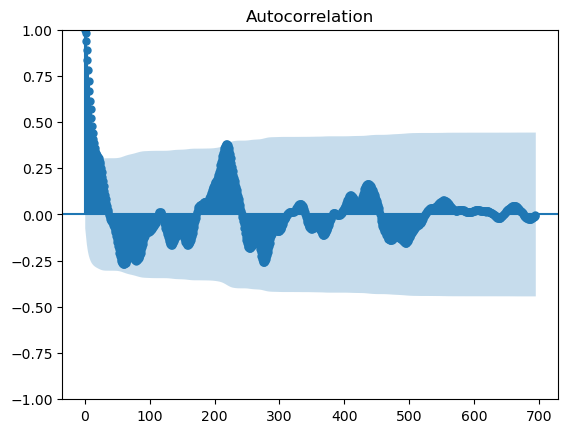

In [126]:
plot_acf(one_month_df['v`_100m'], lags=range(0, 696))
plt.show()